In [2]:
import os
import scvi
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation as mad

scvi.settings.seed = 0
sc.set_figure_params(dpi=100, frameon=False, figsize=(5,5), facecolor='white')
sc.settings.n_jobs = 8

/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
Global seed set to 0


In [3]:
adata = sc.read_h5ad("/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/PhD/Jung/Notebook/Results/adata01.h5ad")

/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


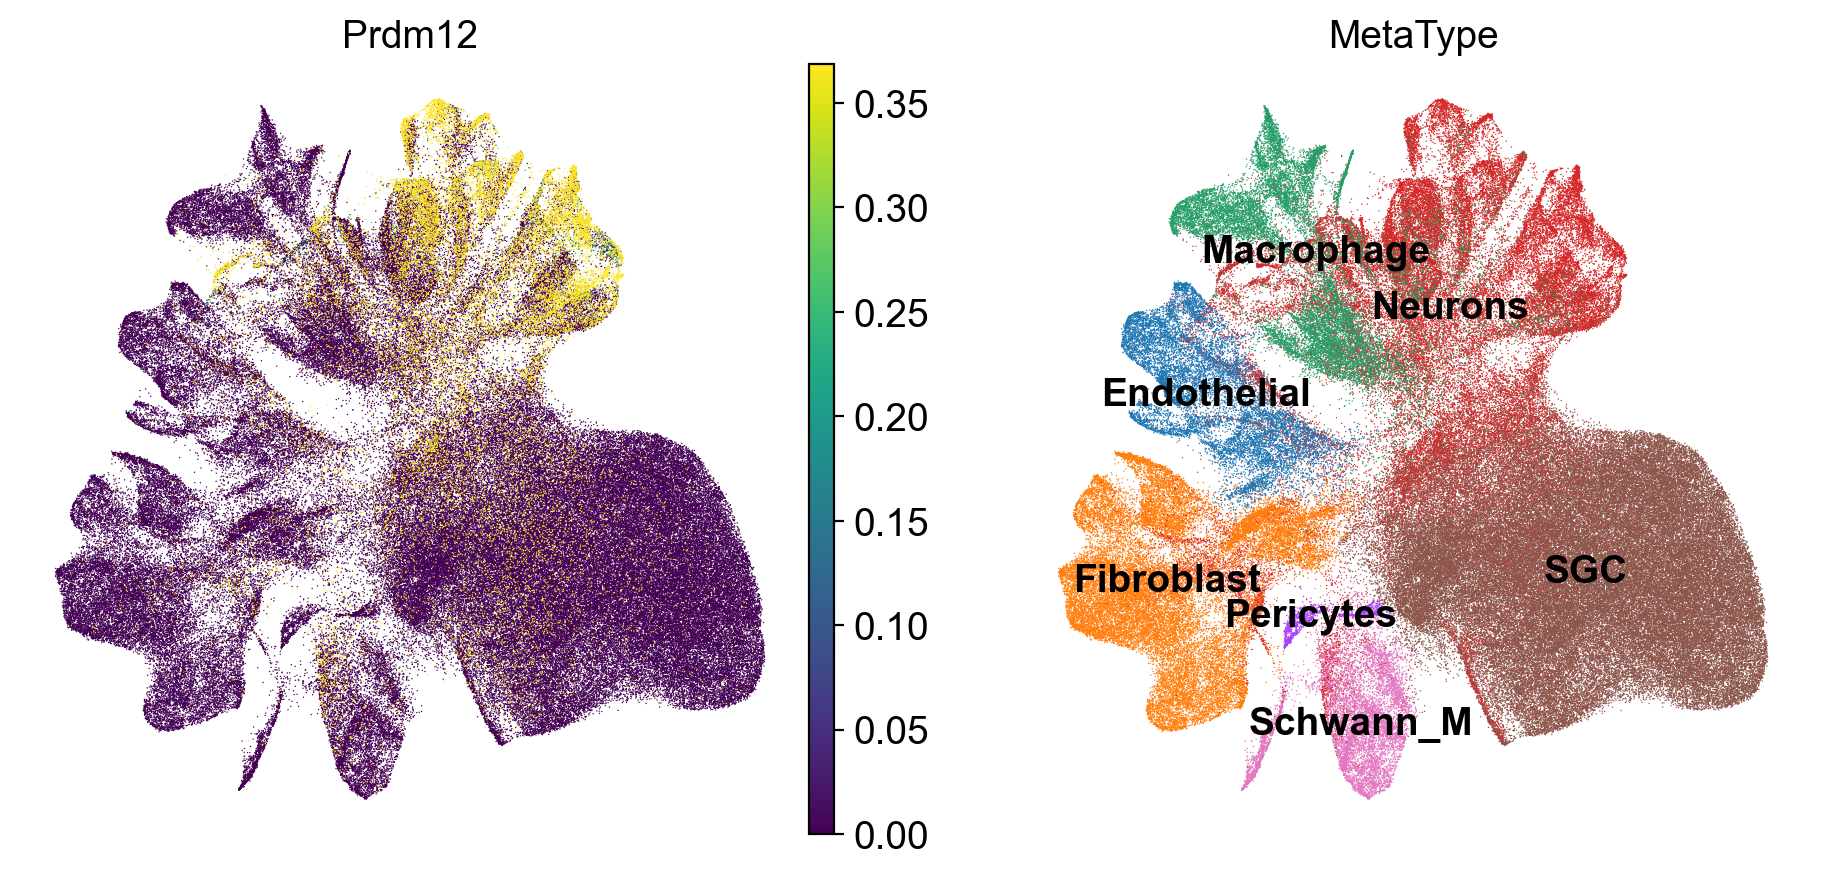

In [4]:
sc.pl.umap(adata,color=['Prdm12','MetaType'], size=1, cmap='viridis', vmin=0, vmax='p90', legend_loc='on data')

In [5]:
homo_adata = adata[adata.obs.Species == 'Homo sapiens'].copy()

/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [6]:
prdm12_idx = homo_adata[(homo_adata[:,'Prdm12'].X > 0)].obs_names.copy()
noci_idx = homo_adata[(homo_adata.obs_names.isin(prdm12_idx)) & (homo_adata.obs.MetaType == 'Neurons')].obs_names.copy()

/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [7]:
homo_adata.obs['NociceptiveType'] = homo_adata.obs.MetaType.astype(str).copy()

In [8]:
homo_adata.obs.NociceptiveType[homo_adata.obs.NociceptiveType == 'Neurons'] = 'NFs'
homo_adata.obs.NociceptiveType[noci_idx] = 'Nociceptors'

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_19244/2173580620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homo_adata.obs.NociceptiveType[homo_adata.obs.NociceptiveType == 'Neurons'] = 'NFs'
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_19244/2173580620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homo_adata.obs.NociceptiveType[noci_idx] = 'Nociceptors'


/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


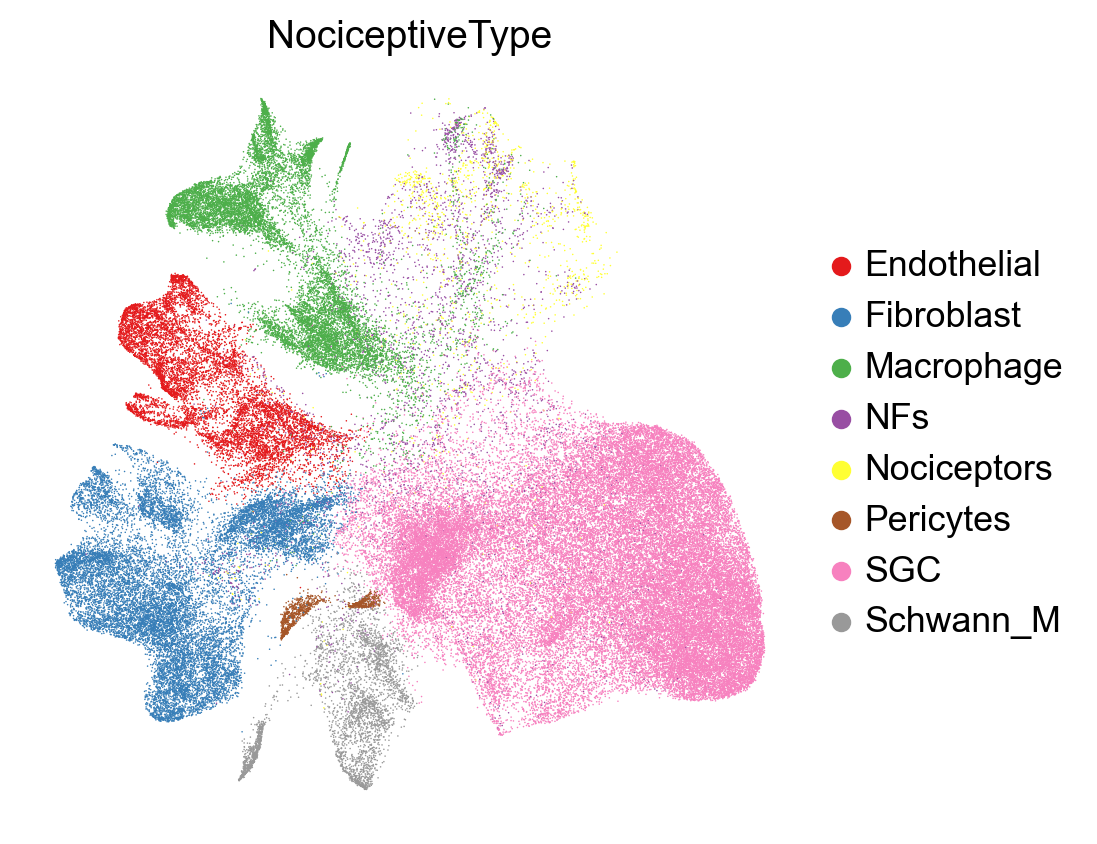

In [14]:
sc.pl.umap(homo_adata,color=['NociceptiveType'], layer='counts', use_raw=False, palette='Set1')

In [10]:
homo_adata.var['Mouse'] = homo_adata.var_names.copy()

In [11]:
homo_adata.var_names = homo_adata.var_names.str.upper()

In [12]:
homo_adata.write('./Results_h5ad/02_scRNA_hDRG_ready.h5ad')